In [1]:
import nltk
import string
import GetOldTweets3 as got
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
def twitter():
    tweet_collected = got.manager.TweetCriteria().setQuerySearch('#coronavirus') \
        .setSince("2019-12-21") \
        .setUntil("2020-01-31") \
        .setMaxTweets(500)
    # Creating list of all tweets
    tweets = got.manager.TweetManager.getTweets(tweet_collected)
    # Creating list of chosen tweet data
    txt_tweets = [[tweet.text] for tweet in tweets]
    return txt_tweets

In [3]:
# reading txt file
txt = ""
txt_tweets = twitter()

length = len(txt_tweets)

for i in range(0, length):
    txt = txt_tweets[i][0] + " " + txt

# converting data to lowercase, removing its punctuations and splitting text into words
lower_case = txt.lower()
cleaned_txt = lower_case.translate(str.maketrans('', '', string.punctuation))
tokenized_words = word_tokenize(cleaned_txt)

In [4]:
txt_tweets

[['we really should stop making jokes about corona virus. and to those people who spreading fake news, you are the virus. #coronavirus'],
 ["South China Morning Post Coronavirus Update 9480 confirmed 'cases' 213 confirmed deaths #WuhanAcuteRespiratorySyndrome #CoronaVirus #WuhanFlu #2019nCoV #nCoV2019 #nCoV https://multimedia.scmp.com/widgets/china/wuhanvirus/"],
 ["Scientists moving with 'unprecedented speed' to find vaccines for #coronavirus 2019-nCoV, Coalition for Epidemic Preparedness Innovation says. Team working to create new breed of vaccines from existing genetic technology &amp; aiming to begin clinical trials within 16 weeks. #lka"],
 ['#piazzapulita Formigli, lo posso dire? Stasera sta storia sul #coronavirus non mi è poi tanto piaciuta come l"hai trattata. Opinione personale, eh!'],
 ['#Coronavirus #CoronavirusOutbreak #China #Coronarvirus #Coronaviruswuhan #WorldNews #Pandemic #LatestNews'],
 ['#BillGates ‘predicted’ Chinese #coronavirus a year ago with simulation saying 

In [5]:
stop_words = stopwords.words('english')

In [6]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

# Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

In [7]:
# Get emotions txt
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

Counter({' fearful': 6, ' sad': 5, ' happy': 4, ' attracted': 2, ' angry': 2, ' fearless': 2, ' ecstatic': 2, ' free': 2, ' alone': 2, ' entitled': 2, ' esteemed': 1, ' powerless': 1, ' surprise': 1, ' obsessed': 1, ' lost': 1, ' safe': 1, ' independent': 1, ' loved': 1, ' average': 1})


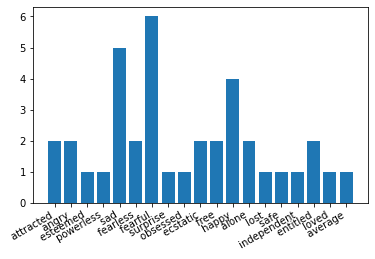

In [8]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [9]:
def twitter():
    tweet_collected = got.manager.TweetCriteria().setQuerySearch('#coronavirus') \
        .setSince("2020-05-01") \
        .setUntil("2020-05-30") \
        .setMaxTweets(500)
    # Creating list of all tweets
    tweets = got.manager.TweetManager.getTweets(tweet_collected)
    # Creating list of chosen tweet data
    txt_tweets = [[tweet.text] for tweet in tweets]
    return txt_tweets

In [10]:
# reading txt file
txt = ""
txt_tweets = twitter()

length = len(txt_tweets)

for i in range(0, length):
    txt = txt_tweets[i][0] + " " + txt

# converting data to lowercase, removing its punctuations and splitting text into words
lower_case = txt.lower()
cleaned_txt = lower_case.translate(str.maketrans('', '', string.punctuation))
tokenized_words = word_tokenize(cleaned_txt)

In [11]:
# Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

In [12]:
# Get emotions txt
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

Counter({' happy': 5, ' attracted': 3, ' sad': 3, ' powerless': 3, ' fearful': 3, ' angry': 2, ' adequate': 2, ' safe': 1, ' average': 1, ' free': 1, ' hated': 1, ' lost': 1})


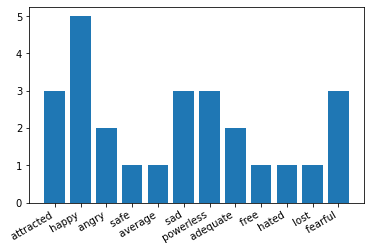

In [13]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()